## Import Libary

2เซลล์แรกใช้เพื่อนำเข้าไลบรารีที่จำเป็นทั้งหมดสำหรับprojectนี้ 
ตรวจสอบให้แน่ใจว่าคุณนำเข้า 'fastai2' ไม่ใช่ 'fastai' เนื่องจากรหัสในสมุดบันทึกนี้ใช้ไม่ได้กับ 'fatsai'


---



In [2]:
!pip install -Uq fastai2
import fastai2
from fastai2.vision import *  

     |████████████████████████████████| 179 kB 15.4 MB/s 


In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 719 kB 14.8 MB/s 
     |████████████████████████████████| 4.4 MB 62.4 MB/s 
     |████████████████████████████████| 362 kB 70.9 MB/s 
     |████████████████████████████████| 1.2 MB 57.9 MB/s 
     |████████████████████████████████| 212 kB 57.1 MB/s 
     |████████████████████████████████| 140 kB 77.0 MB/s 
     |████████████████████████████████| 1.1 MB 60.0 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 596 kB 33.3 MB/s 
     |████████████████████████████████| 127 kB 59.9 MB/s 
     |████████████████████████████████| 144 kB 10.7 MB/s 
     |████████████████████████████████| 271 kB 73.1 MB/s 
     |████████████████████████████████| 94 kB 4.4 MB/s 
     |████████████████████████████████| 6.6 MB 49.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.

# เรามาเริ่ม train model กัน

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

บรรทัดแรกคือรายชื่อcactuslที่เราจะจัดประเภท ตรวจสอบให้แน่ใจว่าชื่อตรงกันทุกประการกับชื่อโฟลเดอร์ที่มีชุดข้อมูลแต่ละชุด
บรรทัดที่สองและสามใช้เพื่อเชื่อมต่อไปยังชุดข้อมูลของเรา
บรรทัดสุดท้ายรับภาพทั้งหมดในแต่ละโฟลเดอร์ในเส้นทางของเรา (จากบรรทัดด้านบน)

In [6]:
cactus = 'Ariocarpus cactus', 'Astroprytum cactus','Echinopsis cactus','Gymnocalycium cactus','Opuntia cactus'
path = '/content/gdrive/MyDrive/Colab Notebooks/cactus demo'
p_path=Path(path)
fns = get_image_files(path)
fns

(#1487) [Path('/content/gdrive/MyDrive/Colab Notebooks/cactus demo/Echinopsis cactus/00000000.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/cactus demo/Echinopsis cactus/00000004.JPG'),Path('/content/gdrive/MyDrive/Colab Notebooks/cactus demo/Echinopsis cactus/00000024.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/cactus demo/Echinopsis cactus/00000016.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/cactus demo/Echinopsis cactus/00000001.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/cactus demo/Echinopsis cactus/00000002.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/cactus demo/Echinopsis cactus/00000007.JPG'),Path('/content/gdrive/MyDrive/Colab Notebooks/cactus demo/Echinopsis cactus/00000021.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/cactus demo/Echinopsis cactus/00000025.jpg'),Path('/content/gdrive/MyDrive/Colab Notebooks/cactus demo/Echinopsis cactus/00000013.jpg')...]

In [7]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])



> คลาส Data loaders ใช้เพื่อแปลงชุดข้อมูลของเราเป็น training และ validation sets



In [8]:
cactacea = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))



> นี่คือ datablock API ของเรา เราใช้มันเพื่อส่งข้อมูลไปยังคลาส data loaders ของเราเกี่ยวกับประเภทของข้อมูลที่เรากำลังดำเนินการอยู่ ('blocks=(ImageBlock, CategoryBlock)') วิธีที่คลาส data loaders จะได้รับข้อมูล (' get_items=get_image_files') วิธีสร้างชุดตรวจสอบความถูกต้อง ('splitter=RandomSplitter(valid_pct=0.2, seed=42)') และวิธีรับป้ายกำกับสำหรับชุดข้อมูลของเรา ('get_y=parent_label') ซึ่งอยู่ใน กรณีนี้มาจากชื่อโฟลเดอร์ที่ไฟล์ของเราอยู่ ซึ่งสามารถมองเห็นได้ว่าเป็นเทมเพลตที่คลาส data loaders ของเราจะใช้



In [ ]:
failed = verify_images(fns)
failed

(#0) []

บรรทัดนี้ง่าย ๆ ตรวจสอบว่าเรามีรูปภาพใด ๆ ที่ดาวน์โหลด fail

In [ ]:
import os

In [ ]:
[os.remove(i) for i in failed]

[None, None]

>เขียนลูปเพื่อลบรูปที่ fail
***อย่าทำแบบนี้เลยนะครับ เราควรให้ความสำคัญกับข้อมูล อาจจะcoppyไปไว้ที่อื่นก่อนแล้วค่อยลบออก***





In [10]:
dls = cactacea.dataloaders(path)



> ตอนนี้เรากำลังส่ง data block ของเราไปยังคลาส data loaders และระบุตำแหน่งของชุดข้อมูลของเราด้วย



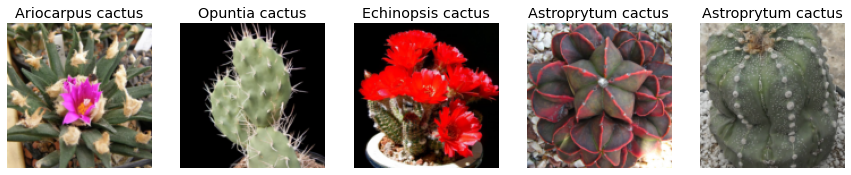

In [11]:
dls.valid.show_batch(max_n=5, nrows=1)



> โค้ดบนแสดงชุดภาพห้าภาพ('max_n=5') จากชุดการตรวจสอบความถูกต้องของเรา ('dls.valid.show_batch') ซึ่งทั้งหมดจัดเรียงเป็นแถวเดียว ('nrows=1')



In [12]:
learn = cnn_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.762511,1.038646,0.757576,06:37


epoch,train_loss,valid_loss,accuracy,time
0,0.740031,0.641268,0.811448,01:13
1,0.490767,0.651996,0.858586,01:14
2,0.340098,0.617881,0.875421,01:13
3,0.235268,0.593251,0.872054,01:12
4,0.166189,0.580799,0.872054,01:13




> นี่คือที่ที่เราสร้างlearner/โมเดลของเรา โดยใช้ resnet50 ซึ่งเป็นโมเดลที่ได้รับการฝึกอบรมล่วงหน้าโดยมีอัตราข้อผิดพลาดเป็นตัวชี้วัดของเรา เราฝึกแบบจำลองของเรา 5 epoch และแบบจำลองของเรามีความแม่นยำอยู่ที่ 0.872054


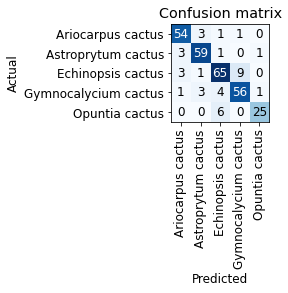

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()



> เราต้องการดูประสิทธิภาพของโมเดลของเราในvalidation setของเรา โมเดลของเราสามารถจำแนกรูปภาพทั้งหมดได้ถูกต้องจำนวนหนึ่ง ที่เห็นชัดที่สุดคือ Ophuntia ที่โมเดลดัน predictว่าเป็น echinopsis เราจะดูที่ภาพที่คาดเดาผิดในเซลล์ถัดไป



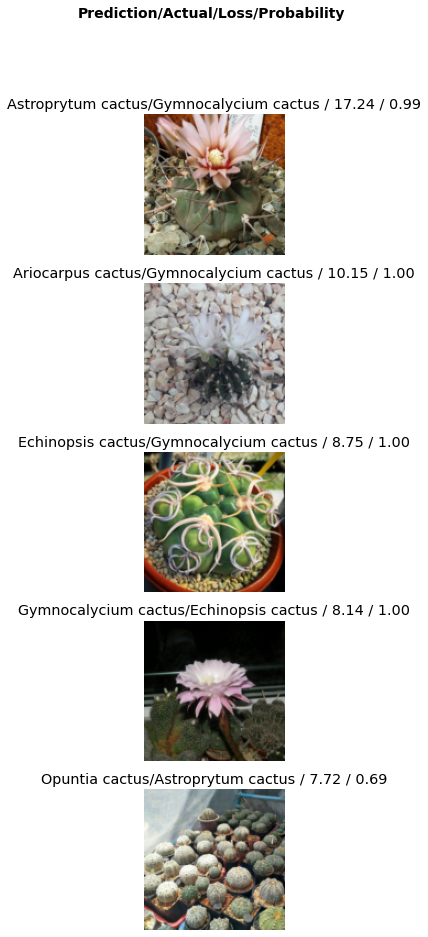

In [14]:
interp.plot_top_losses(5, nrows=5)



> โค้ดด้านบนแสดงให้เราเห็นภาพที่lossสูงสุด ภาพแต่ละภาพมีPredict labels Actual labels loss และ ความน่าจะเป็นตามลำดับ นี่คือวิธีที่เราตรวจสอบรูปภาพที่จัดประเภทผิด




In [15]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]



> ส่งออกโมเดล



# ทดสอบโมเดลที่ได้

In [17]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

['Ariocarpus cactus', 'Astroprytum cactus', 'Echinopsis cactus', 'Gymnocalycium cactus', 'Opuntia cactus']

In [16]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [18]:
btn_upload = SimpleNamespace(data = ['/content/gdrive/MyDrive/Colab Notebooks/cactus demo/Gymnocalycium cactus/00000041.jpg'])

In [19]:
img = PILImage.create(btn_upload.data[-1])

In [20]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [21]:
pred,pred_idx,probs = learn_inf.predict(img)

In [22]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Gymnocalycium cactus; Probability: 0.9995')

In [23]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [24]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [25]:
btn_upload = widgets.FileUpload()

In [27]:
VBox([widgets.Label('Select your image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])